In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [92]:
base_data = pd.read_excel("/content/baseEnade17_Sistemas.xlsx")

def calcular_percent(presence):
    total = presence.sum()
    return (presence / total * 100).round(2)

gender_presence = base_data['SEXO'].value_counts()
gender_percent = calcular_percent(gender_presence)


result = pd.concat([gender_presence, gender_percent], axis=1, keys=['PRESENÇA', 'PERCENTUAL (%)'])
result.reset_index(inplace=True)

def converter_sexo(valor):
    if valor == 'M':
        return 'Masculino'
    elif valor == 'F':
        return 'Feminino'
    else:
        return 'Valor inválido'

result['SEXO'] = result['SEXO'].apply(converter_sexo)

print("Sexo dos Alunos:")
print("")
print(result)

Sexo dos Alunos:

        SEXO  PRESENÇA  PERCENTUAL (%)
0  Masculino       108            86.4
1   Feminino        17            13.6


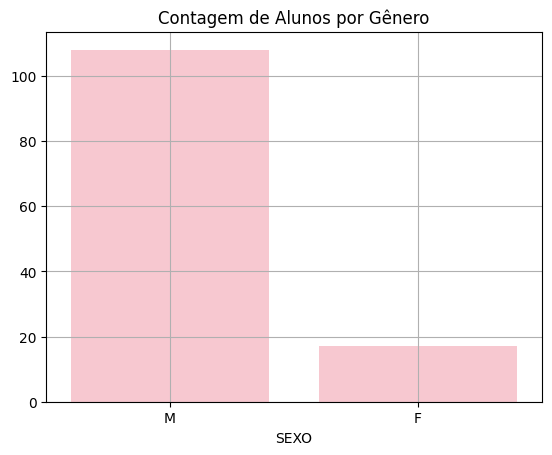

In [157]:
sns.countplot(x='SEXO', data=base_data, color='pink')
plt.title('Contagem de Alunos por Gênero')
plt.ylabel('')
plt.grid(True)
plt.show()

In [169]:
study_shift = base_data['TURNO'].value_counts()
study_percent = calcular_percent(study_shift)


result = pd.concat([study_shift, study_percent], axis=1, keys=['PRESENÇA', 'PERCENTUAL (%)'])
result.reset_index(inplace=True)

def converter_turno(valor):
    if valor == 4:
        return 'Noturno'
    elif valor == 1:
        return 'Matutino'
    elif valor == 3:
        return 'Integral'

result['TURNO'] = result['TURNO'].apply(converter_turno)

print("Turno de Estudo:")
print("")
print(result)

Turno de Estudo:

      TURNO  PRESENÇA  PERCENTUAL (%)
0   Noturno        80            64.0
1  Matutino        25            20.0
2  Integral        20            16.0


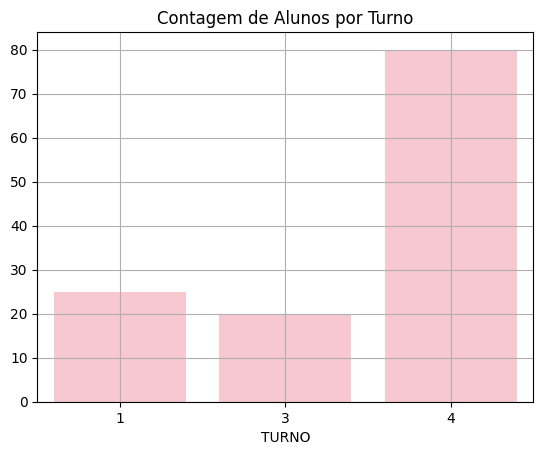

In [158]:
sns.countplot(x='TURNO', data=base_data, color='pink')
plt.title('Contagem de Alunos por Turno')
plt.ylabel('')
plt.grid(True)
plt.show()

In [168]:
course_modality = base_data['MODALIDADE'].value_counts()
course_percent = calcular_percent(course_modality)


result = pd.concat([course_modality, course_percent], axis=1, keys=['PRESENÇA', 'PERCENTUAL (%)'])
result.reset_index(inplace=True)

def converter_modalidade(valor):
    if valor == 0:
        return 'EAD'
    elif valor == 1:
        return 'Presencial'
    else:
        return 'Valor inválido'

result['MODALIDADE'] = result['MODALIDADE'].apply(converter_modalidade)

print("Modalidade do Curso:")
print("")
print(result)

Modalidade do Curso:

   MODALIDADE  PRESENÇA  PERCENTUAL (%)
0  Presencial       106            84.8
1         EAD        19            15.2


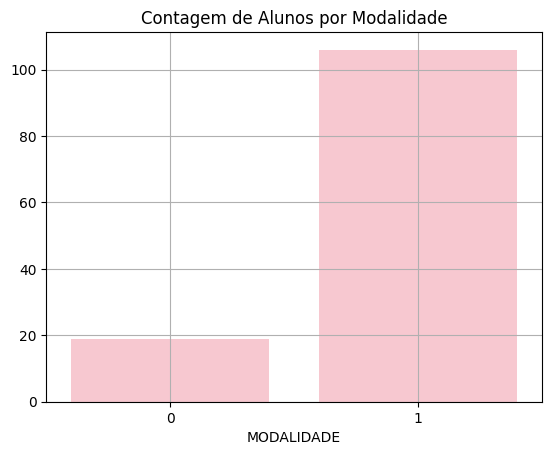

In [159]:
sns.countplot(x='MODALIDADE', data=base_data, color='pink')
plt.title('Contagem de Alunos por Modalidade')
plt.ylabel('')
plt.grid(True)
plt.show()

In [120]:
course_category = base_data['CATEGORIA'].value_counts()
category_percent = calcular_percent(course_category)

result = pd.concat([course_category, category_percent], axis=1, keys=['PRESENÇA', 'PERCENTUAL (%)'])
result.reset_index(inplace=True)
result.rename(columns={'index': 'Categoria'}, inplace=True)

print("Modalidade do Curso:")
print("")
print(result)

Modalidade do Curso:

  CATEGORIA  PRESENÇA  PERCENTUAL(%)
0   Privada        91           72.8
1   Publica        34           27.2


In [130]:
category_shift = base_data.groupby(['CATEGORIA', 'TURNO']).size()

cate_shift_percent = calcular_percent(category_shift)

def converter_turno(valor):
    if valor == 4:
        return 'Noturno'
    elif valor == 1:
        return 'Matutino'
    else:
        return 'Integral'

result = pd.concat([category_shift, cate_shift_percent], axis=1, keys=['PRESENÇA', 'PERCENTUAL (%)'])
result.reset_index(inplace=True)

result['TURNO'] = result['TURNO'].apply(converter_turno)

print("Modalidade do Curso:")
print("")
print(result)

Modalidade do Curso:

  CATEGORIA     TURNO  PRESENÇA  PERCENTUAL (%)
0   Privada  Matutino        12             9.6
1   Privada  Integral        20            16.0
2   Privada   Noturno        59            47.2
3   Publica  Matutino        13            10.4
4   Publica   Noturno        21            16.8


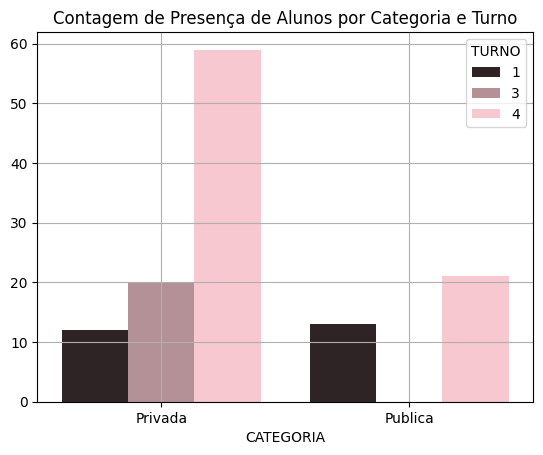

In [166]:
sns.countplot(x='CATEGORIA', hue='TURNO', data=base_data, palette='dark:pink')
plt.title('Contagem de Presença de Alunos por Categoria e Turno')
plt.ylabel('')
plt.grid(True)
plt.show()

In [136]:
nota_geral = base_data[['NOTA_GERAL']]

media = nota_geral.mean()
mediana = nota_geral.median()
desvio_padrao = nota_geral.std()
coeficiente_variacao = (desvio_padrao / media) * 100

print("Notas Gerais")
print("Média:", media.values[0])
print("Mediana:", mediana.values[0])
print("Desvio Padrão:", desvio_padrao.values[0])
print("Coeficiente de Variação (CV):", coeficiente_variacao.values[0])


Notas Gerais
Média: 38.880799999999994
Mediana: 39.6
Desvio Padrão: 13.190518931316515
Coeficiente de Variação (CV): 33.92553376297946


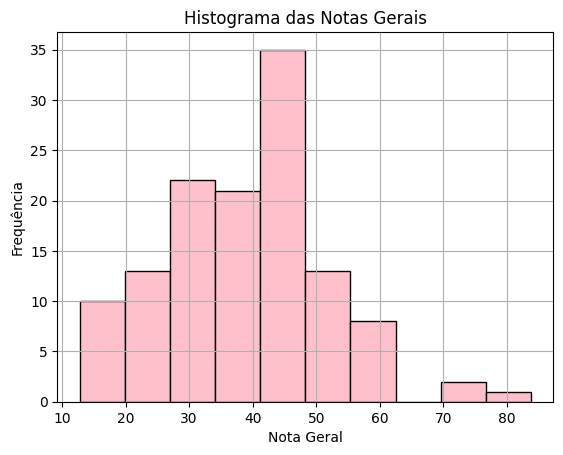

In [153]:
plt.hist(nota_geral['NOTA_GERAL'], color='pink', edgecolor='black')
plt.title('Histograma das Notas Gerais')
plt.xlabel('Nota Geral')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

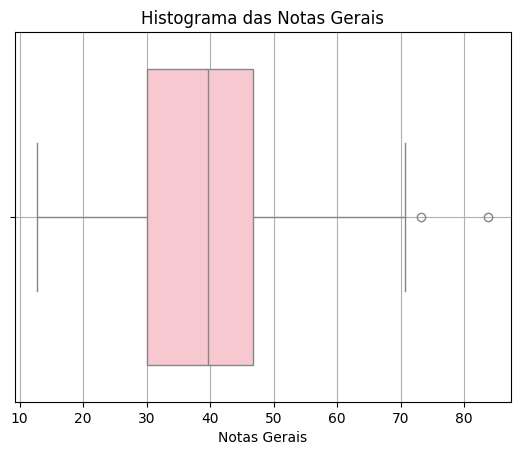

In [152]:
sns.boxplot(x='NOTA_GERAL', data=nota_geral, color='pink')
plt.title('Histograma das Notas Gerais')
plt.xlabel('Notas Gerais')
plt.grid(True)
plt.show()